In [8]:
from simulation.ks import KS
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ks = KS(tmax=0.3, fid=256, device=device)
params= torch.randn(1024, 256).to(device)
# params[10:]=0
u = ks.query_in(params)

traj = [u]
for _ in range(340):
    traj.append(ks.query_out(traj[-1]))

In [9]:
traj = torch.stack(traj, dim=1)
print(traj.shape)

torch.Size([1024, 341, 256])


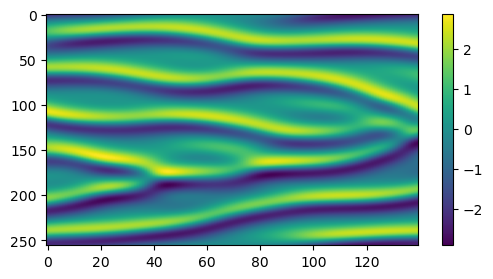

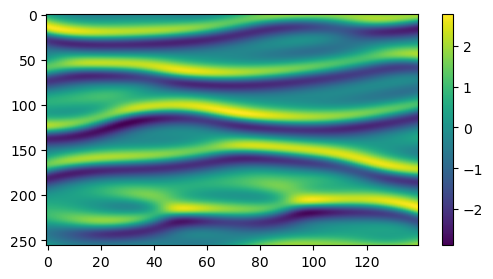

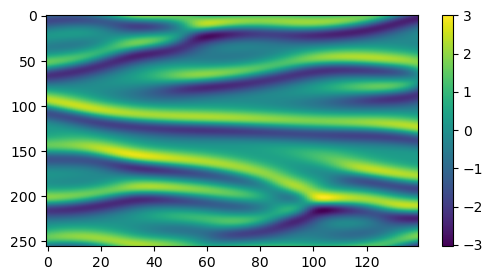

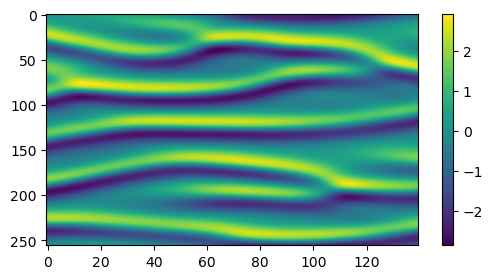

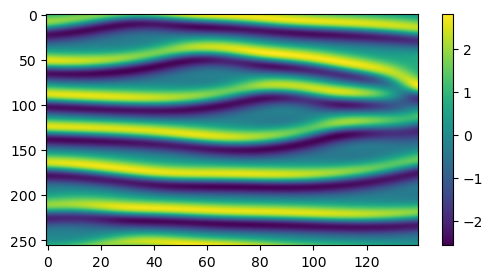

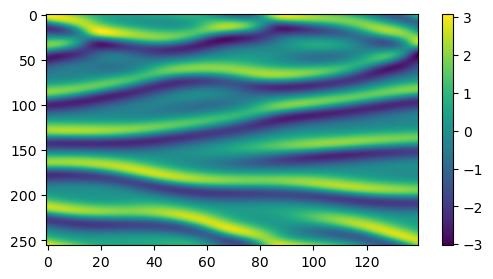

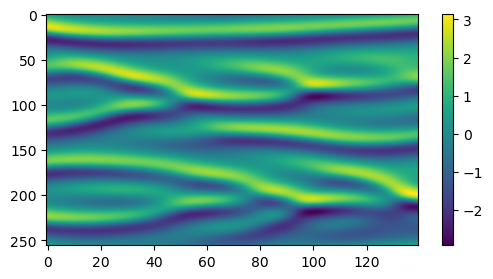

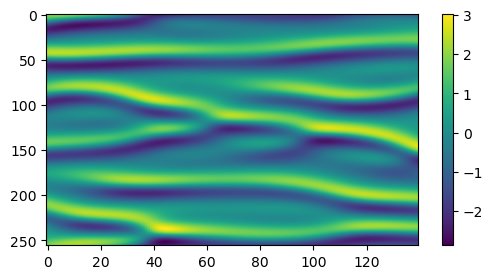

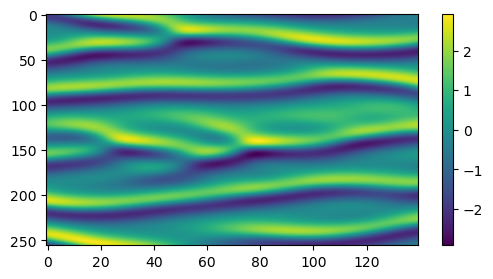

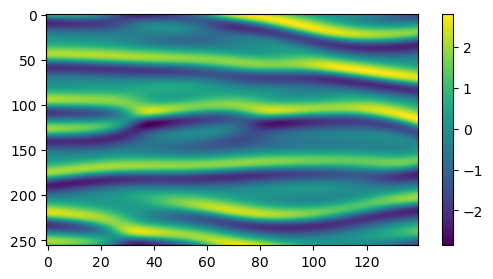

In [11]:
from matplotlib import pyplot as plt


for i in range(10):
    plt.figure(figsize=(6,3))
    plt.imshow(traj[i, 200:340].cpu().numpy().T, aspect='auto')
    plt.colorbar()

In [7]:
for i in range(10):
    print(traj[i,200:340:10].norm(dim=1).tolist())
    

[19.768293380737305, 19.56378936767578, 19.32743263244629, 20.001893997192383, 20.879730224609375, 23.85353660583496, 21.611248016357422, 18.416929244995117, 19.61109161376953, 20.194589614868164, 19.736095428466797, 19.506385803222656, 19.158721923828125, 19.370946884155273]
[23.16678810119629, 22.58791160583496, 22.958431243896484, 20.202585220336914, 20.177024841308594, 19.82646942138672, 20.54808807373047, 20.680274963378906, 19.172372817993164, 19.852022171020508, 20.323150634765625, 20.252641677856445, 20.92208480834961, 21.331844329833984]
[18.491748809814453, 20.43587303161621, 21.296436309814453, 21.463146209716797, 20.60707664489746, 21.96074867248535, 21.041208267211914, 22.08671760559082, 22.880586624145508, 21.336774826049805, 22.00981903076172, 22.563678741455078, 21.996530532836914, 22.230728149414062]
[20.163484573364258, 19.42457389831543, 21.2667293548584, 20.054141998291016, 20.33997344970703, 20.77770233154297, 21.37837791442871, 21.101661682128906, 21.4090118408203